In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)

x_train: (50000, 32, 32, 3)


In [2]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr


w1: (3072, 10)
b1: (10,)


In [3]:
iterations =  300
lr = 1.3e-2
lr_decay=0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x = x_train[indices]
    y = y_train[indices]
    y_pred = x.dot(w1) + b1
    # Forward pass
    loss = 1./batch_size*np.square(y_pred-y).sum() + reg* np.sum(w1*w1)
    loss_history.append(loss)
    if t%10==0:
        print('Epoches %d / %d: loss %f' % (t, iterations, loss))
    # Backward pass
    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw1=x.T.dot(dy_pred) + reg*w1
    db1=dy_pred.sum(axis=0)
    w1 -= lr*dw1
    b1 -= lr*db1
    lr *=lr_decay


Epoches 0 / 300: loss 0.999987
Epoches 10 / 300: loss 0.880178
Epoches 20 / 300: loss 0.846299
Epoches 30 / 300: loss 0.826950
Epoches 40 / 300: loss 0.815139
Epoches 50 / 300: loss 0.807640
Epoches 60 / 300: loss 0.802693
Epoches 70 / 300: loss 0.799291
Epoches 80 / 300: loss 0.796847
Epoches 90 / 300: loss 0.795012
Epoches 100 / 300: loss 0.793575
Epoches 110 / 300: loss 0.792407
Epoches 120 / 300: loss 0.791426
Epoches 130 / 300: loss 0.790581
Epoches 140 / 300: loss 0.789839
Epoches 150 / 300: loss 0.789176
Epoches 160 / 300: loss 0.788577
Epoches 170 / 300: loss 0.788030
Epoches 180 / 300: loss 0.787527
Epoches 190 / 300: loss 0.787062
Epoches 200 / 300: loss 0.786630
Epoches 210 / 300: loss 0.786227
Epoches 220 / 300: loss 0.785849
Epoches 230 / 300: loss 0.785494
Epoches 240 / 300: loss 0.785160
Epoches 250 / 300: loss 0.784844
Epoches 260 / 300: loss 0.784545
Epoches 270 / 300: loss 0.784262
Epoches 280 / 300: loss 0.783992
Epoches 290 / 300: loss 0.783736


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

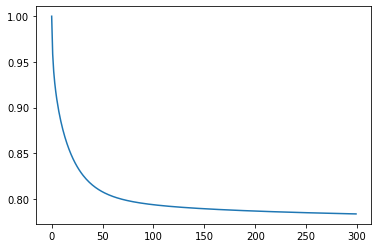

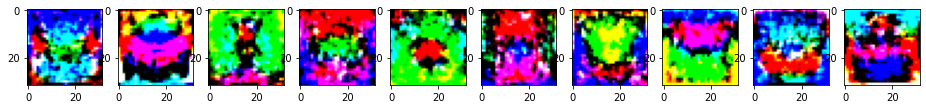

x_train -> (50000, 3072)
train_acc =  0.58122
x_test -> (50000, 3072)
test_acc =  0.5946


In [4]:
# Printing accuracies and displaying w as images
plt.plot(loss_history)
f, axarr = plt.subplots(1,10)
f.set_size_inches(16,6)

for i in range(10 ):
    img = w1[:, i].reshape(32, 32, 3)
    axarr[i].imshow(img*1000)
plt.show()

x_t=x_train
print('x_train ->' , x_t.shape)
y_pred=x_t.dot(w1)+b1

train_acc= 1.0-(1/Ntr)*(np.abs(np.argmax(y_train, axis=1)==np.argmax(y_pred, axis=1))).sum()
print('train_acc = ', train_acc)

x_te=x_test
print('x_test ->' , x_t.shape)
y_prede=x_te.dot(w1)+b1

test_acc_e= 1.0-1/Nte*(np.abs(np.argmax(y_test, axis=1)==np.argmax(y_prede, axis=1))).sum()
print('test_acc = ', test_acc_e)